<a href="https://colab.research.google.com/github/shashwat-2077/ComputerVisionWeek_AI/blob/main/Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
imgBGR = cv2.imread("/content/drive/MyDrive/Code/CV Week/jugal.png")


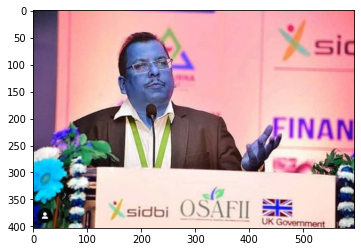

In [ ]:
plt.imshow(imgBGR)

In [ ]:
img = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

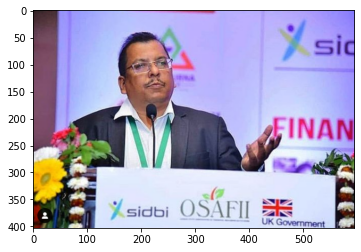

In [ ]:
plt.imshow(img)

In [ ]:
# Stacking images horizontally
imgHor = np.hstack((img, img))

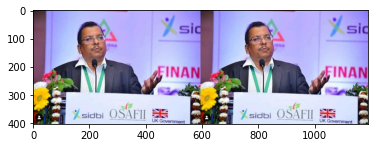

In [ ]:
plt.imshow(imgHor)

In [ ]:
# Stacking images vertically:
imgVertical = np.vstack((img, img))

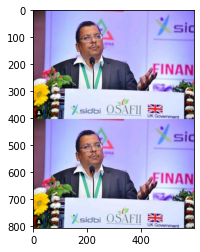

In [ ]:
plt.imshow(imgVertical)

In [ ]:
# Custom-made function to stack images:
def stackImages(scale, imgArray):
    """

    :rtype: image
    """
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range(0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape[:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]),
                                                None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y] = cv2.cvtColor(imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank] * rows
        hor_con = [imageBlank] * rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None, scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor = np.hstack(imgArray)
        ver = hor
    return ver

In [ ]:
# Example: // first convrting the function to grayscale image to obtain a clear difference of the images
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
imgStack = stackImages(0.5, ([img, imgGray, img], [img, imgGray, img])) #passing the image to the stack function to make the stack of 3 x 2 matrix

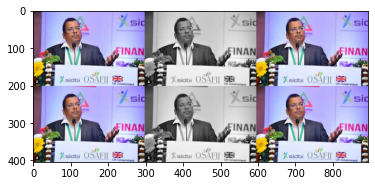

In [ ]:
plt.imshow(imgStack)